In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [54]:

all_data = [[] for i in range(16)]
all_truth_data = [[] for i in range(16)]
for i in range(16):
    fname = "results/forecastFlux-bigtest-{:05d}-full.csv".format(i+1)
    print(fname)
    # results = np.genfromtxt(fname)
    # print(results[0].shape)
    # ^ didn't work, i don't think numpy processed the weird data format
    # (see example in next cell)
    f = open(fname,"r")
    ens_data = map(lambda x: map(float,x.split(",")),f.read().rstrip().split("\n"))
    f.close()
    # this works, see example two cells down
    all_data[i] = ens_data
    fname = "results/truthFlux-bigtest-{:05d}-full.csv".format(i+1)
    f = open(fname,"r")
    all_truth_data[i] = map(float,f.read().rstrip().split("\n"))
    f.close()

ERROR! Session/line number was not unique in database. History logging moved to new session 116
results/forecastFlux-bigtest-00001-full.csv
results/forecastFlux-bigtest-00002-full.csv
results/forecastFlux-bigtest-00003-full.csv
results/forecastFlux-bigtest-00004-full.csv
results/forecastFlux-bigtest-00005-full.csv
results/forecastFlux-bigtest-00006-full.csv
results/forecastFlux-bigtest-00007-full.csv
results/forecastFlux-bigtest-00008-full.csv
results/forecastFlux-bigtest-00009-full.csv
results/forecastFlux-bigtest-00010-full.csv
results/forecastFlux-bigtest-00011-full.csv
results/forecastFlux-bigtest-00012-full.csv
results/forecastFlux-bigtest-00013-full.csv
results/forecastFlux-bigtest-00014-full.csv
results/forecastFlux-bigtest-00015-full.csv
results/forecastFlux-bigtest-00016-full.csv


In [55]:
# double check that float() can convert the weird data format
float("-1322772545e-18")

-1.322772545e-09

In [56]:
# look at what we got here!
print(len(ens_data))
print(len(ens_data[0]))
print(ens_data[0][0])

20
350
3.172987675e-09


In [78]:
# at every 20 timepoints, let's grab the prediction
all_forecasts = [[] for i in range(16)]
hits_and_misses = [[] for i in range(16)]
assim_times = np.arange(0+20,2000,20)
for t in assim_times:
    for i in range(len(all_data)):
        if len(all_data[i][0]) > t:
#             print(i)
#             print(t)
            flux = 0.0
            for j in range(20):
                flux += all_data[i][j][int(t)]
            all_forecasts[i].append(flux/20.0)
            reversal_sgn = all_truth_data[i][int(t)]*all_truth_data[i][int(t)-20] 
            if reversal_sgn and all_truth_data[i][int(t)]*flux > 0:
                # print("a reversal happened, and we predicted it")
                hits_and_misses[i].append(1.0)
            if reversal_sgn and all_truth_data[i][int(t)]*flux < 0:
                # print("a reversal happened, and we missed it")
                hits_and_misses[i].append(0.0)

In [82]:
print(hits_and_misses[0])
print(np.mean(hits_and_misses[0]))

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
0.541666666667


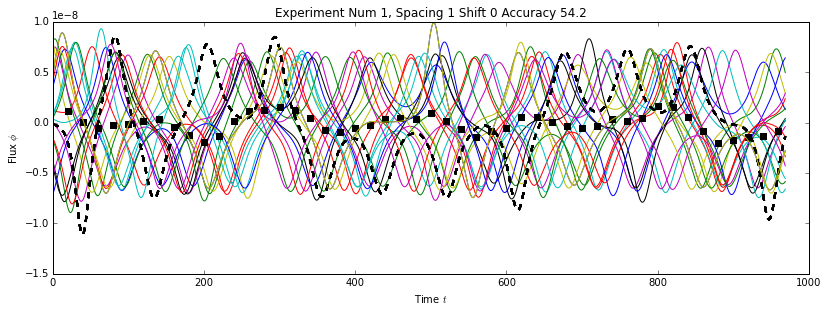

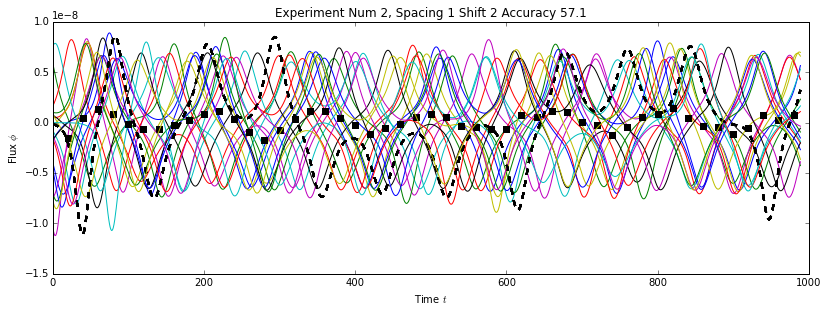

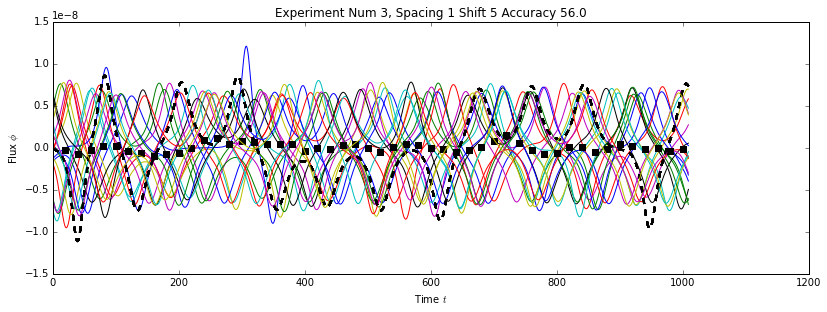

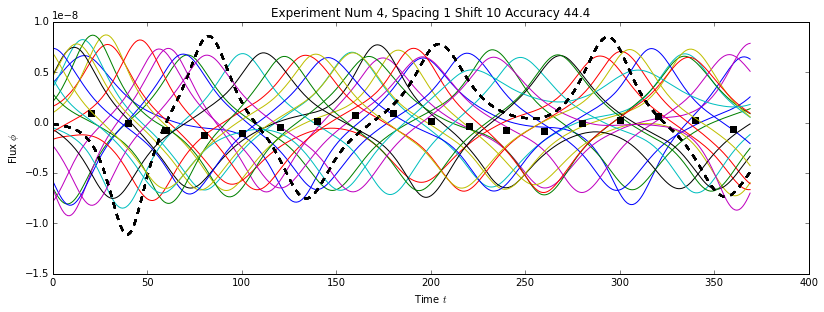

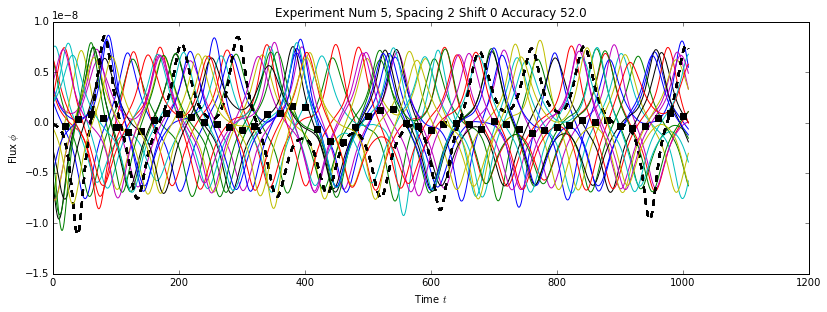

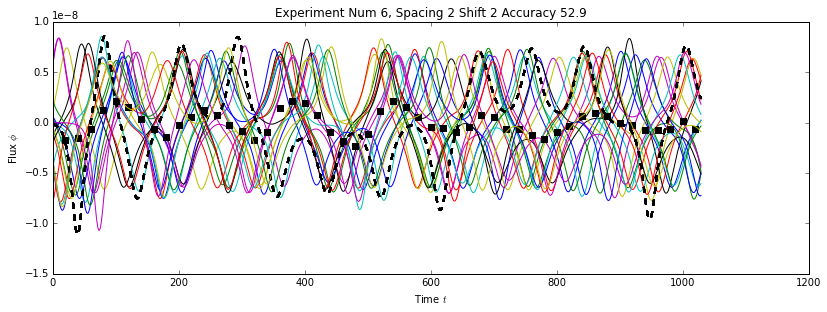

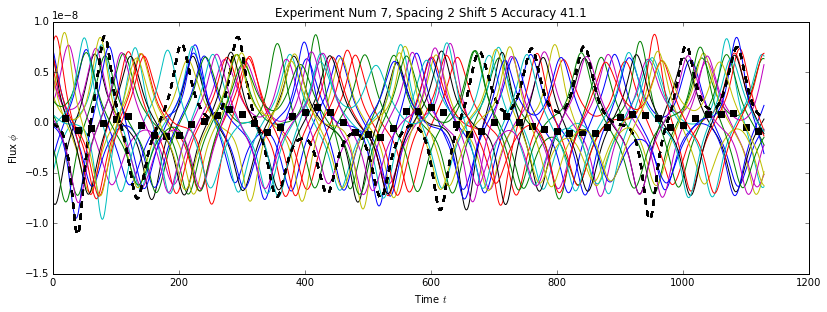

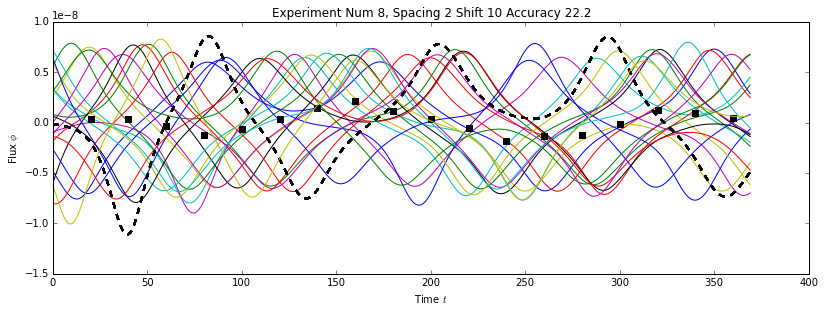

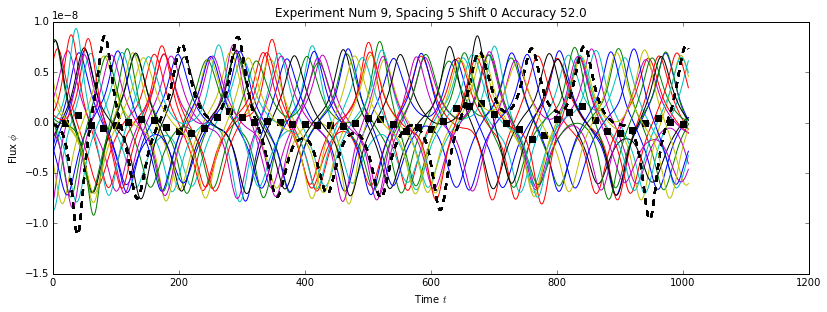

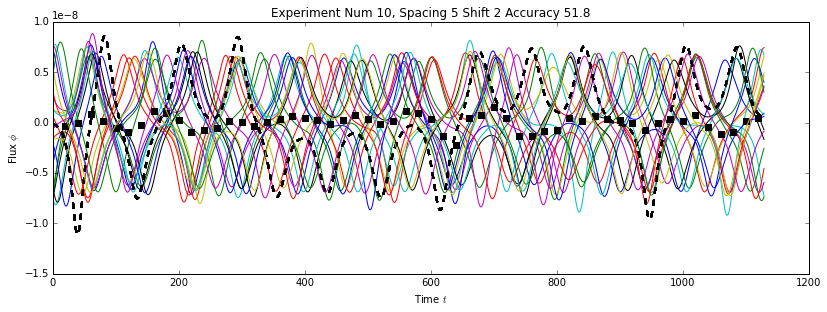

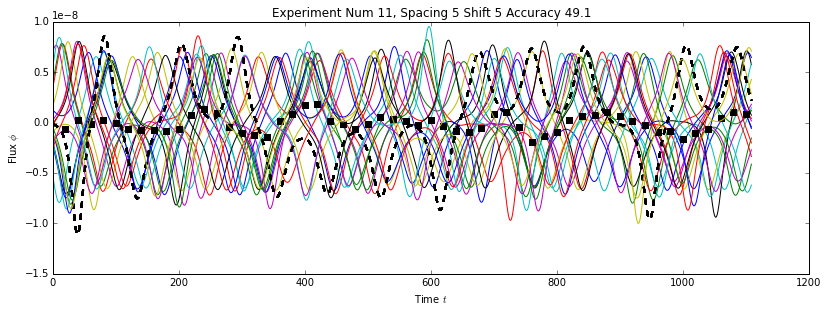

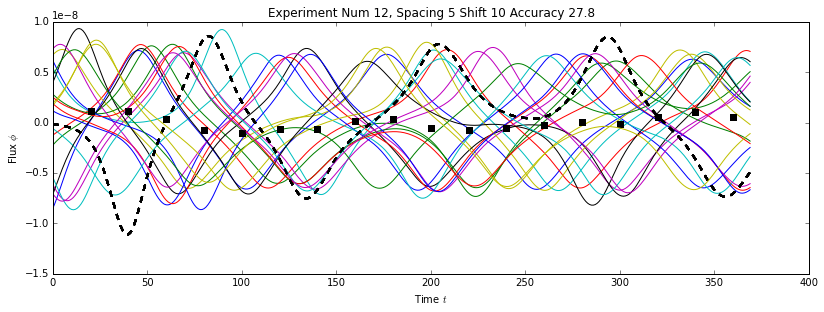

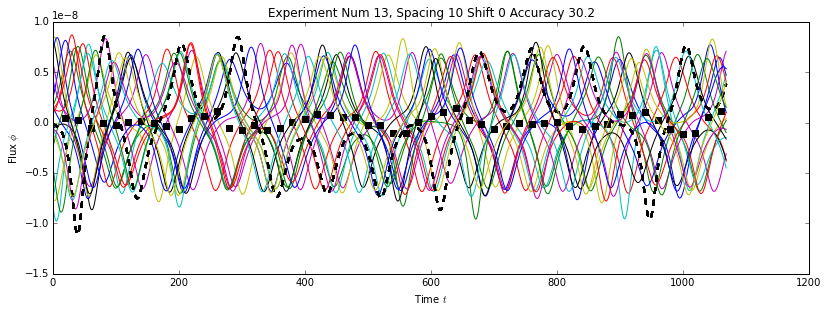

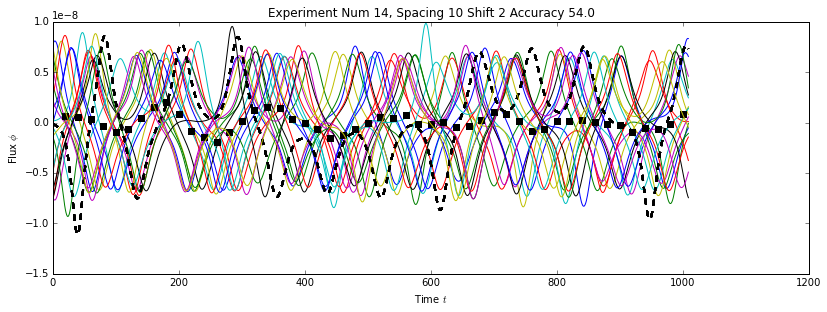

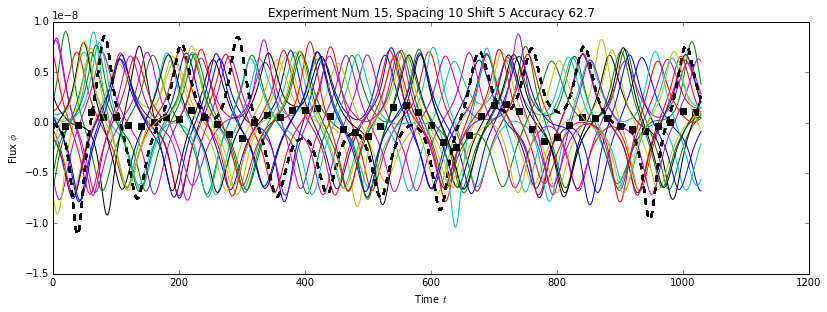

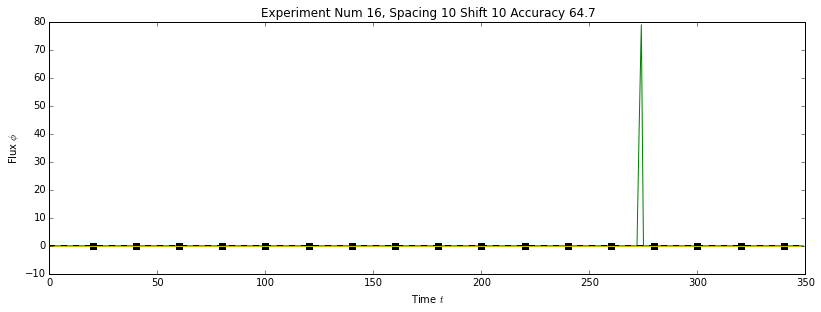

In [90]:
shifts = [0,2,5,10,]
spacings = [1,2,5,10,]
for exp in range(16):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_axes([.2,.2,.7,.7])
    for i in range(len(all_data[exp])):
        ax.plot(np.arange(0+20,len(all_truth_data[exp]),20),all_forecasts[exp],'ks')
        ax.plot(all_truth_data[exp],'k--',linewidth=2)
        ax.plot(all_data[exp][i])
    ax.set_xlabel("Time $t$")
    ax.set_ylabel("Flux $\phi$")
    loop_i = int(np.floor((exp)/4.0))+1
    loop_j = (exp+1)-4*(loop_i-1)
    shift = shifts[loop_j-1]
    spacing = spacings[loop_i-1]
    ax.set_title("Experiment Num {0}, Spacing {1} Shift {2} Accuracy {3:.1f}".format(exp+1,spacing,shift,np.mean(hits_and_misses[exp])*100))

In [53]:
all_truth_data[0]

[]

In [61]:
map(max,all_data[15])

[8.623140525000001e-09,
 8.281687095e-09,
 7.077364099999999e-09,
 7.0789262374999995e-09,
 7.245985629999999e-09,
 8.77580505e-09,
 7.9851067025e-09,
 6.664105845e-09,
 7.295335300000001e-09,
 8.554403715e-09,
 8.353329175e-09,
 6.685966949e-09,
 7.916708775e-09,
 7.099257240000001e-09,
 8.210811325e-09,
 78.95,
 7.8424732e-09,
 7.893818025000001e-09,
 6.737867175e-09,
 6.880205374999999e-09]

[[3.495047625e-09,
  3.7672085e-09,
  4.051405275e-09,
  4.3499966e-09,
  4.65983125e-09,
  4.9774812250000005e-09,
  5.2953749e-09,
  5.6093125e-09,
  5.9151544e-09,
  6.208273824999999e-09,
  6.472067877500001e-09,
  6.7086655825e-09,
  6.908766672499999e-09,
  7.0660468e-09,
  7.1862156375e-09,
  7.260247325e-09,
  7.28777375e-09,
  7.2684472225000005e-09,
  7.204207674999999e-09,
  7.1007233475e-09,
  6.9568676249999994e-09,
  6.780451249999999e-09,
  6.575853157500001e-09,
  6.344021425e-09,
  6.091325100000001e-09,
  5.8209749104425e-09,
  5.5388393775e-09,
  5.247502045750001e-09,
  4.9541854825e-09,
  4.659097865e-09,
  4.3684043475e-09,
  4.083890755e-09,
  3.805522547500001e-09,
  3.5370491449999997e-09,
  3.2785492832499998e-09,
  3.0311696899999996e-09,
  2.79444227e-09,
  2.569526565e-09,
  2.35541744e-09,
  2.1514961599999997e-09,
  1.9574370275e-09,
  1.77133912e-09,
  1.5920632175e-09,
  1.4197821225000001e-09,
  1.254062975e-09,
  1.0935969325e-09,
  9.395882854999998e

[[ 54.16666667  57.14285714  56.          44.44444444]
 [ 52.          52.94117647  41.07142857  22.22222222]
 [ 52.          51.78571429  49.09090909  27.77777778]
 [ 30.18867925  54.          62.74509804  64.70588235]]


<matplotlib.colorbar.Colorbar instance at 0x10c7d5710>

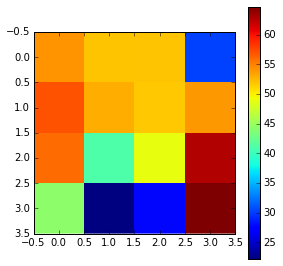

In [103]:
shifts = [0,2,5,10,]
spacings = [1,2,5,10,]
accuracy_matrix = np.zeros([4,4])
for exp in range(16):
    loop_i = int(np.floor((exp)/4.0))+1
    loop_j = (exp+1)-4*(loop_i-1)
    accuracy_matrix[loop_i-1,loop_j-1] = np.mean(hits_and_misses[exp])*100
#     shift = shifts[loop_j-1]
#     spacing = spacings[loop_i-1]

print(accuracy_matrix)
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.2,.2,.7,.7])
plt.colorbar(cax)